## 1.0
**Problem 1.** Develop a program using a python programming language and implement the steepest descent method to locate a minimum of $$f(x,y)=-8x+x^2+12y+4y^4-2xy \tag{1}$$ using initial guesses $x=0$ and $y=0$. Make a contour plot for $-4\leq x\leq 10$ and $-4\leq y\leq 4$, depict specific levels $-15,-5,-0.05,0,10$ of the function $f$ and a single point corresponding to the minimum of $f(x,y)$ found using your implementation of the steepest descent method.  

In [13]:
#1.1
import numpy as np
import matplotlib.pyplot as plt

def steepest(f,dfdx,dfdy,x0, y0):  
    for i in range(100):
        xn = x0 - 0.01*dfdx(x0, y0)
        yn = y0 - 0.01*dfdy(x0, y0)
        x0 = xn
        y0 = yn
    return xn, yn

In [21]:
#1.2
def f(x,y):
    f = - 8*x + x**2 + 12*y + 4*y**4 - 2*x*y
    return f

def dfdx(x,y):
    dfdx = - 8 + 2*x - 2*y
    return dfdx

def dfdy(x,y):
    dfdy = 12 + 16*y**3 - 2*x
    return dfdy

steepest(f, dfdx, dfdy, 0, 0)


(2.8048822176907473, -0.7392690204752574)

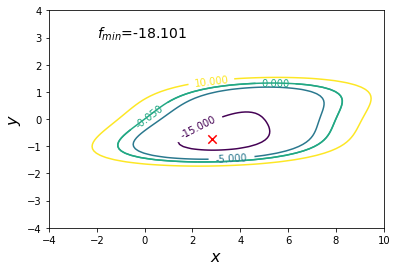

In [22]:
#1.3
x = np.linspace(-4, 10, 100)
y = np.linspace(-4, 4, 100)

X, Y = np.meshgrid(x, y)
S = f(X, Y)
CS = plt.contour(X, Y, S, [-15, -5, -0.05, 0, 10])
plt.clabel(CS)
plt.xlabel('$x$', size = 16)
plt.ylabel('$y$', size = 16)
plt.scatter(xopt, yopt, marker = 'x', s = 70, color = 'r')
plt.text(-2, 3, '$f_{min}$='f'{f(xopt, yopt): .3f}', size = 14)
plt.show()

## 2.0
**Problem 2.**
<br>**1)** Use Python to implement the least-squares linear regression where your model function is a second-order polynomial: $$f(x)=a_0+a_1x+a_2x^2. \tag{2}$$ 
<br>**2)** Fit the following data

| <i></i> | <i></i> | <i></i> | <i></i> | <i></i> | <i></i> | <i></i> | <i></i> | <i></i> | <i></i> | <i></i> |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| x | 0.3 | 0.5 | 0.77 | 0.98 | 1.55 | 2.2 | 2.5 | 3.0 | 3.6 | 4.1 |
| y | 7.49 | 10.03 | 13.78 | 17.7 | 23. | 26.45 | 23.48 | 23.68 | 15.28 | 7.79 |

with a parabola described by the model $f(x)$ in Eq. (2). Determine $a_0$, $a_1$ and $a_2$ coefficients.
<br>**3)** Make a scatter plot of the data presented in **2)** and show the regression curve $f(x)$ on the same graph. Choose $x$ in [0,4.5] range.

In [16]:
#2.1
def leastsquares(x, y):                      
    n = len(x)    
    X = np.empty((n, 3))
    y = y
    
    for i in range(n):
        for j in range(3):
            X[i, j] = x[i]**j  
            
    A = np.matmul(np.transpose(X), X)
    b = np.matmul(np.transpose(X), y)
    a = np.linalg.solve(A, b)
    
    return a

In [25]:
#2.2
x = np.array([0.3, 0.5, 0.77, 0.98, 1.55, 2.2, 2.5, 3.0, 3.6, 4.1])
y = np.array([7.49, 10.03, 13.78, 17.7, 23., 26.45, 23.48, 23.68, 15.28, 7.79])

a=leastsquares(x, y)
a

array([ 0.41792821, 22.39857826, -5.02756045])

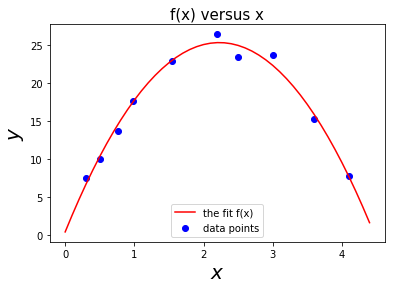

In [26]:
#2.3
def f(x):
    f = a[0] + a[1]*x + a[2]*x**2
    return f

x_new = np.arange(0, 4.5, 0.1)

plt.scatter(x, y, c = 'b', label = 'data points')
plt.plot(x_new, f(x_new), c = 'r', label = 'the fit f(x)')

plt.title('f(x) versus x', fontsize='15')
plt.xlabel(r'$x$',size=20)
plt.ylabel(r'$y$',size=20)
plt.legend(loc='lower center',fontsize='10')
plt.show()

## 3.0
**Problem 3.** Fit linear splines $$\begin{array}{l} f(x)=f(x_0)+m_0(x-x_0) \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ x_0\leq x\leq x_1 \\ f(x)=f(x_1)+m_1(x-x_1) \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ x_1\leq x\leq x_2 \\ \ \ \ \ \ \ \ \vdots \\ f(x)=f(x_{n-2})+m_{n-2}(x-x_{n-2}) \ \ \ \ \ \ \ x_{n-2}\leq x\leq x_{n-1} \end{array} \tag{3}$$ where $$m_i=\frac{f(x_{i+1})-f(x_{i})}{x_{i+1}-x_{i}}, \ \ \ \ \ \ i=\overline{0,n-2}.$$ to the same data used in **Problem 2**. Use the results to estimate the value at $x=3.5$. $n$ is the total number of $(x,y)$ data points.

In [19]:
#3.1
m = np.zeros(np.size(x)-1)
for i in range(np.size(m)):
    m[i] = (y[i+1]-y[i])/(x[i+1]-x[i])
    print(f'm_{i} = {m[i]}')

m_0 = 12.699999999999996
m_1 = 13.888888888888888
m_2 = 18.666666666666668
m_3 = 9.298245614035087
m_4 = 5.307692307692306
m_5 = -9.900000000000002
m_6 = 0.3999999999999986
m_7 = -13.999999999999998
m_8 = -14.980000000000011


In [20]:
#3.2
print(f'The estimated value at x = 3.5 is {y[7]+m[7]*(3.5-x[7])}')

The estimated value at x = 3.5 is 16.68
